# PIMA Model using PYCaret 2.3.10 - Classification



In [16]:
import pandas as pd

In [17]:
!pip install squarify

In [18]:
!curl https://raw.githubusercontent.com/Aditi-Asati/Diabetic-Patient-Model/master/datasets_228_482_diabetes.csv > datasets_228_482_diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23875  100 23875    0     0   448k      0 --:--:-- --:--:-- --:--:--  448k


In [19]:
dataset=pd.read_csv('datasets_228_482_diabetes.csv')

In [20]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
dataset.shape # we have  768 rows and 9 data columns  


(768, 9)

In [22]:
print(sum(dataset.Outcome == 0))
print(sum(dataset.Outcome == 1))

500
268


# EDA 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify


In [24]:
Diabetic = dataset[(dataset['Outcome'] != 0)]
Non_diabetic = dataset[(dataset['Outcome'] == 0)]


def target_count():
    trace = go.Bar( x = dataset['Outcome'].value_counts().values.tolist(), 
                    y = ['Non_diabetic','diabetic' ], 
                    orientation = 'h', 
                    text=dataset['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)



In [25]:
target_count()


Dataset is clearly unbalanced we can use SMOTE sampling to balance the classes. But In this notebook we are not going to look at it. 

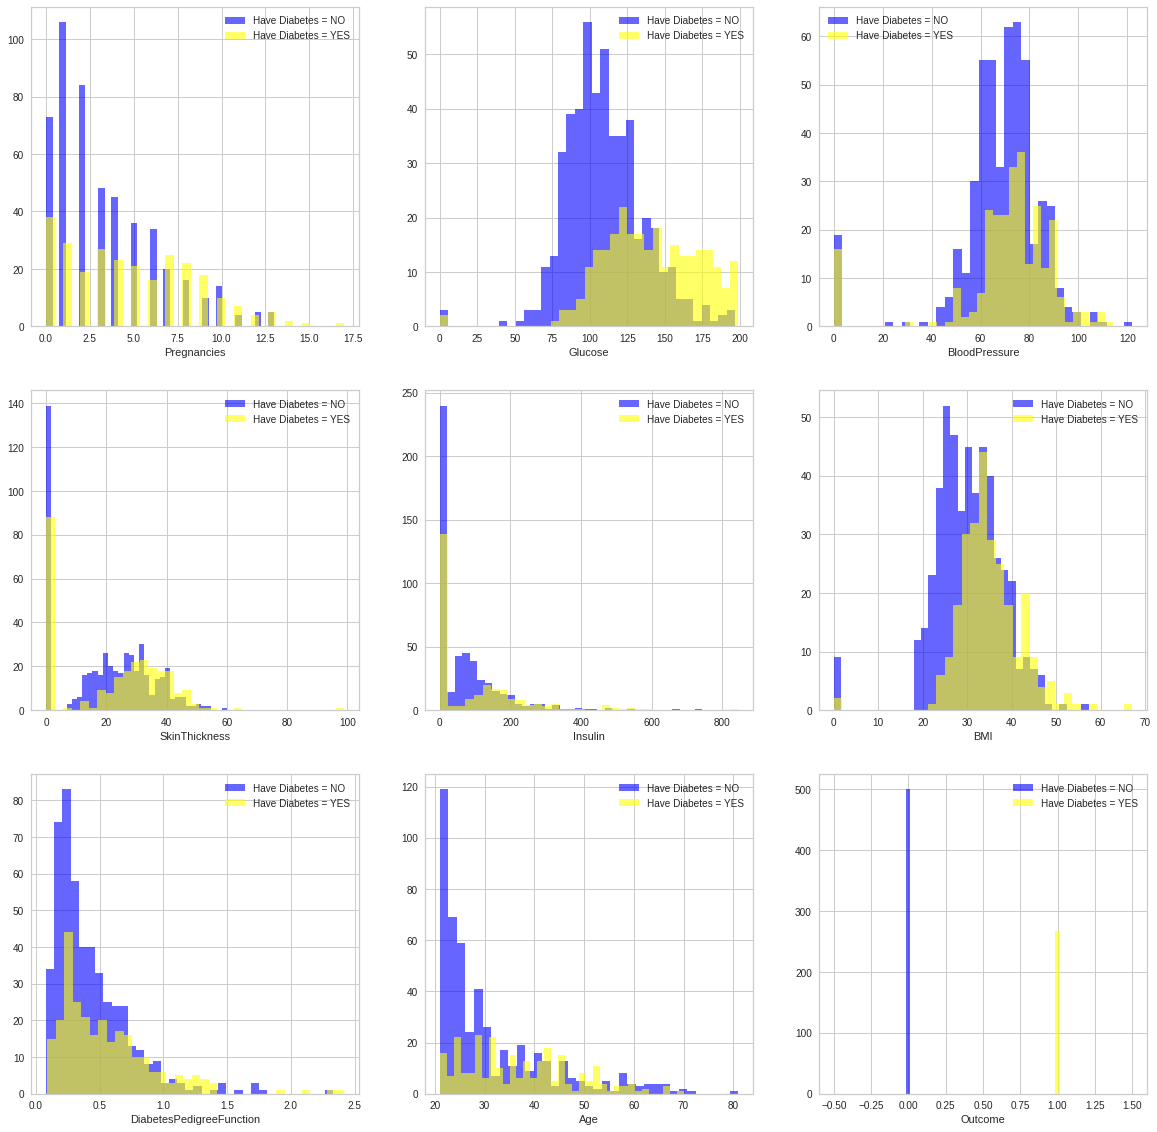

In [26]:
# Visulazing the distibution of the data for every feature
plt.figure(figsize=(20, 20))

for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 3, i)
    dataset[dataset["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    dataset[dataset["Outcome"] == 1][column].hist(bins=35, color='yellow', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Before doing anything the first thing we need to do is splitting data into training set and validation set. 
1)	Training set : - Data set on which we build the model  and fine tune the model. 
2)	Validation set: - Data set on which we test how well our finalized model is performing. It is important that during the modelling stage we don’t expose this data for our model. This should be unseen instance for our model.


In [27]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (730, 9)
Unseen Data For Predictions (38, 9)


In [14]:
!pip3 install jinja2

In [15]:
!pip install markupsafe==2.0.1

I have 730 data points to model and 38 data points to test my model. 

In [1]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [48]:
import pycaret

In [49]:
pycaret.__version__

'2.3.10'

Setup function in PyCaret is the most important function this is where we perform all our data preprocessing steps. 
•	Data = Data for modelling 
•	Target = Target column that we want to predict in this case it is diabetic or not 
•	Session_id  = User defined session id 
•	Normalization =  Machine learning models work well when the input features do not have huge variation such as BMI and  Glucose their values are on different scale. It is important to scale then hence we use normalize parameter 
•	Transformation = While normalization reduces the variance transformation changes the data so that It could be represented in Gaussian distribution (normal curve).
•	Multicollinearity: - When the data  is highly co-related our algorithms tend not to generalize very well so it is important to remove multi- collinearity by using the remove_multicollinearity  and multicollinearity_threshold parameters in setup
•	Sometimes a dataset may have a categorical feature with multiple levels, where distribution of such levels are skewed and one level may dominate over other levels. This means there is not much variation in the information provided by such feature.  For a ML model, such feature may not add a lot of information and thus can be ignored for modeling. This can be achieved in PyCaret using ignore_low_variance parameter 


In [28]:
clf = setup(data = data, target = 'Outcome',session_id=1229,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1229
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(730, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


Before you proceed Make sure all your data types are inferred correctly If so press enter if not change the data types. You can find more info about data types that on this page https://pycaret.org/data-types/

In [29]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7627,0.8349,0.6199,0.6923,0.6514,0.4731,0.4767,0.118
lr,Logistic Regression,0.7765,0.8312,0.6190,0.7233,0.6654,0.4993,0.5040,0.320
lda,Linear Discriminant Analysis,0.7784,0.8279,0.6304,0.7218,0.6707,0.5056,0.5099,0.017
lightgbm,Light Gradient Boosting Machine,0.7667,0.8172,0.6421,0.6930,0.6645,0.4867,0.4890,0.084
rf,Random Forest Classifier,0.7471,0.8095,0.5760,0.6790,0.6194,0.4328,0.4386,0.517
ada,Ada Boost Classifier,0.7373,0.8040,0.5719,0.6558,0.6071,0.4129,0.4172,0.115
et,Extra Trees Classifier,0.7216,0.7852,0.5377,0.6232,0.5726,0.3711,0.3751,0.465
knn,K Neighbors Classifier,0.7451,0.7730,0.5702,0.6723,0.6091,0.4247,0.4325,0.120
nb,Naive Bayes,0.6824,0.7558,0.3921,0.5891,0.4640,0.2552,0.2675,0.015
dt,Decision Tree Classifier,0.7020,0.6806,0.6035,0.5858,0.5934,0.3587,0.3596,0.018


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1229, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
catboost = create_model('catboost',fold =10) #CatBoost Classifier

ValueError: ignored

In [ ]:
tuned_cat_boost= tune_model('catboost', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7647,0.8806,0.5294,0.6923,0.6000,0.4375
1,0.8431,0.8910,0.5882,0.9091,0.7143,0.6129
2,0.8235,0.8720,0.5882,0.8333,0.6897,0.5714
3,0.8039,0.8956,0.6111,0.7857,0.6875,0.5479
4,0.7255,0.7744,0.6111,0.6111,0.6111,0.3990
5,0.7451,0.8266,0.4444,0.7273,0.5517,0.3878
6,0.5882,0.7037,0.3889,0.4118,0.4000,0.0870
7,0.7647,0.8283,0.5556,0.7143,0.6250,0.4574
8,0.6471,0.8030,0.3333,0.5000,0.4000,0.1639
9,0.7451,0.7946,0.6111,0.6471,0.6286,0.4348


Well we have improved from 82.27 tp 82.70 

In [ ]:
#Lets Create  more classifiers 

In [34]:
lr = create_model('lr', fold =10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7059,0.7878,0.5263,0.6250,0.5714,0.3500,0.3530
1,0.7647,0.7056,0.5263,0.7692,0.6250,0.4622,0.4799
2,0.9020,0.8816,0.8421,0.8889,0.8649,0.7880,0.7887
3,0.7647,0.8783,0.6842,0.6842,0.6842,0.4967,0.4967
4,0.7843,0.8653,0.6111,0.7333,0.6667,0.5092,0.5138
5,0.7255,0.7879,0.5556,0.6250,0.5882,0.3834,0.3849
6,0.8235,0.8805,0.6667,0.8000,0.7273,0.5984,0.6039
7,0.8431,0.8636,0.6667,0.8571,0.7500,0.6383,0.6490
8,0.7647,0.8434,0.6111,0.6875,0.6471,0.4715,0.4733


In [38]:
tuned_lr= tune_model(lr) # tuned_logistic   81.6 AUC

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7059,0.7862,0.5263,0.6250,0.5714,0.3500,0.3530
1,0.7647,0.7039,0.5263,0.7692,0.6250,0.4622,0.4799
2,0.9020,0.8799,0.8421,0.8889,0.8649,0.7880,0.7887
3,0.7647,0.8701,0.6842,0.6842,0.6842,0.4967,0.4967
4,0.7843,0.8653,0.6111,0.7333,0.6667,0.5092,0.5138
5,0.7451,0.7862,0.6111,0.6471,0.6286,0.4348,0.4352
6,0.8235,0.8771,0.6667,0.8000,0.7273,0.5984,0.6039
7,0.8627,0.8603,0.6667,0.9231,0.7742,0.6792,0.6978
8,0.7647,0.8519,0.6111,0.6875,0.6471,0.4715,0.4733


In [39]:
gbc= create_model('gbc',fold =10) #  Gradient boosting  82.60

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6863,0.8092,0.5263,0.5882,0.5556,0.3143,0.3154
1,0.6863,0.7681,0.4737,0.6000,0.5294,0.2990,0.3037
2,0.8627,0.9293,0.7895,0.8333,0.8108,0.7032,0.7039
3,0.7647,0.8355,0.6316,0.7059,0.6667,0.4857,0.4875
4,0.7647,0.8316,0.7222,0.6500,0.6842,0.4975,0.4993
5,0.7451,0.8316,0.5556,0.6667,0.6061,0.4199,0.4238
6,0.8235,0.8502,0.6667,0.8000,0.7273,0.5984,0.6039
7,0.8039,0.8754,0.6111,0.7857,0.6875,0.5479,0.5571
8,0.7647,0.8316,0.7222,0.6500,0.6842,0.4975,0.4993


In [40]:
tuned_graident_bosting = tune_model(gbc) # tuned Gradient boosting 80.5 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6471,0.7171,0.4211,0.5333,0.4706,0.2113,0.2147
1,0.6471,0.6875,0.4211,0.5333,0.4706,0.2113,0.2147
2,0.8039,0.9227,0.7368,0.7368,0.7368,0.5806,0.5806
3,0.7451,0.8191,0.6842,0.6500,0.6667,0.4605,0.4609
4,0.7451,0.8384,0.6111,0.6471,0.6286,0.4348,0.4352
5,0.7647,0.8350,0.6111,0.6875,0.6471,0.4715,0.4733
6,0.8235,0.8333,0.6667,0.8000,0.7273,0.5984,0.6039
7,0.8235,0.8586,0.7222,0.7647,0.7429,0.6087,0.6093
8,0.7647,0.8182,0.6111,0.6875,0.6471,0.4715,0.4733


In [ ]:
# Finalizing the model

In [44]:
final_model = finalize_model(tuned_graident_bosting)

In [ ]:
# Moment of truth … let’s see how our classifier does if we can predict using the unseen data 

In [47]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6053,0.6812,0.4667,0.5,0.4828,0.1642,0.1645


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label,Score
0,5,116,74,0,0,25.6,0.201,30,0,0,0.9361
1,1,146,56,0,0,29.7,0.564,29,0,1,0.9001
2,7,103,66,32,0,39.1,0.344,31,1,0,0.8374
3,1,71,48,18,76,20.4,0.323,22,0,0,0.9860
4,2,107,74,30,100,33.6,0.404,23,0,0,0.9506
5,3,170,64,37,225,34.5,0.356,30,1,1,0.8616
6,6,85,78,0,0,31.2,0.382,42,0,0,0.9660
7,1,138,82,0,0,40.1,0.236,28,0,0,0.6479
8,0,108,68,20,0,27.3,0.787,32,0,1,0.6135
9,7,179,95,31,0,34.2,0.164,60,0,1,0.7389


Label and score are added to the data frame. 
•	Label is the predicted outcome 
•	Score is the predicted probability 
